In [76]:
!git clone https://github.com/jieunchoi/MIST_codes.git

Cloning into 'MIST_codes'...
remote: Enumerating objects: 1092, done.
remote: Total 1092 (delta 0), reused 0 (delta 0), pack-reused 1092
Receiving objects: 100% (1092/1092), 247.26 KiB | 1.49 MiB/s, done.
Resolving deltas: 100% (740/740), done.


In [4]:
%cd "/home/dutta/Downloads/Summer'24/MIST_codes/scripts"
import read_mist_models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/dutta/Downloads/Summer'24/MIST_codes/scripts


In [171]:
%cd "/home/dutta/Downloads/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS"

/home/dutta/Downloads/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS


In [177]:
# Replace 'path_to_file.track.eep' with the actual file path
file_path = '00100M.track.eep'
eep = read_mist_models.EEP(file_path)
# print(eep)

Reading in: 00100M.track.eep


In [173]:
print('version: ', eep.version)
print('abundances: ', eep.abun)
print('rotation: ', eep.rot)
print('initial mass: ', eep.minit)
print('available columns: ', eep.hdr_list)

version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142857, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
rotation:  0.0
initial mass:  1.0
available columns:  ['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma', 'mass_conv_

In [174]:
# eep.plot_HR(color='Black', phases=[0, 6], phasecolor=['Red', 'Blue'])
log_L = eep.eeps['log_L']
log_Teff = eep.eeps['log_Teff']

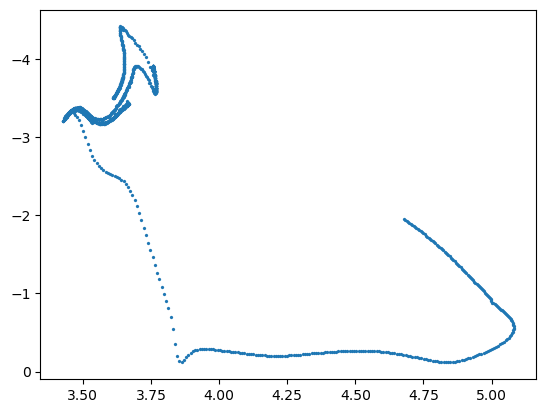

In [176]:
plt.scatter(log_Teff, log_L, s=5, linewidths=0.1)
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [156]:
import numpy as np

# Constants
M_sun = 4.83  # Absolute magnitude of the Sun
L_sun = 1     # Luminosity of the Sun (in solar units)

# Coefficients for the B-V color index calculation
a = -3.684
b = 8.499
c = -5.417
d = 1.353
e = 0  # Often omitted

def luminosity_to_absolute_magnitude(log_L):
    """Convert log(L/L_sun) to absolute magnitude."""
    L = 10 ** log_L  # Convert log(L) to L
    M = M_sun - 2.5 * np.log10(L / L_sun)
    return M

def teff_to_bv(log_Teff):
    """Convert log(T_eff) to intrinsic color index (B-V)."""
    bv = (a +
          b * log_Teff +
          c * log_Teff**2 +
          d * log_Teff**3 +
          e * log_Teff**4)
    return bv

# Convert log_L to absolute magnitude
M = luminosity_to_absolute_magnitude(log_L)

# Convert log_Teff to intrinsic color index (B-V)
bv = teff_to_bv(log_Teff)

# # Print results
# print("Absolute Magnitude (M):", M)
# print("Intrinsic Color Index (B-V):", bv)

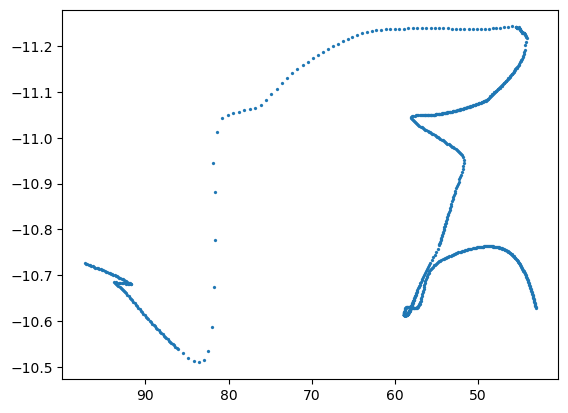

In [157]:
plt.scatter(bv, M, s=5, linewidths=0.1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

In [158]:
%cd "/home/dutta/Downloads/2-20"

/home/dutta/Downloads/2-20


Reading in: ./01600M.track.eep
Reading in: ./01200M.track.eep
Reading in: ./01700M.track.eep
Reading in: ./00500M.track.eep
Reading in: ./00800M.track.eep
Reading in: ./00200M.track.eep
Reading in: ./01500M.track.eep
Reading in: ./01000M.track.eep
Reading in: ./00900M.track.eep
Reading in: ./01800M.track.eep
Reading in: ./01100M.track.eep
Reading in: ./01300M.track.eep
Reading in: ./00700M.track.eep
Reading in: ./02000M.track.eep
Reading in: ./00300M.track.eep
Reading in: ./01400M.track.eep
Reading in: ./01900M.track.eep
Reading in: ./00600M.track.eep
Reading in: ./00400M.track.eep


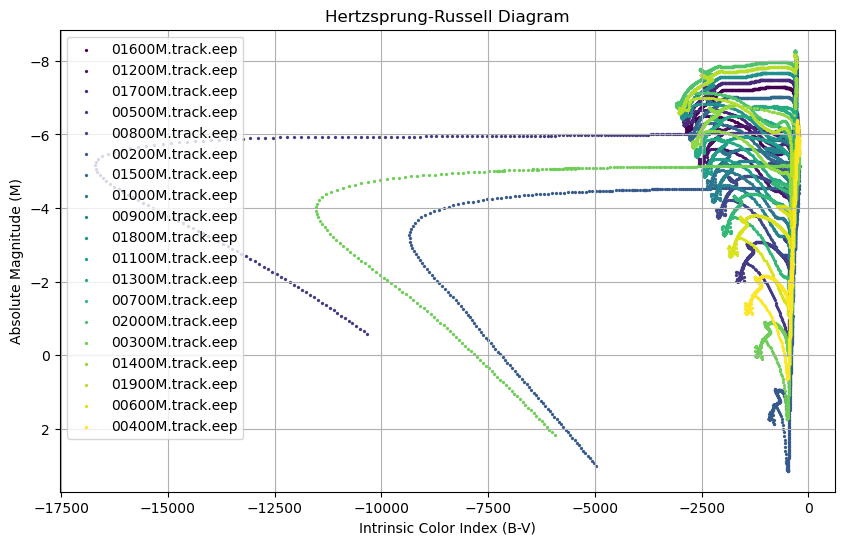

In [161]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import read_mist_models
import numpy as np

# Constants
M_sun = 4.83  # Absolute magnitude of the Sun
L_sun = 1     # Luminosity of the Sun (in solar units)

# Coefficients for the B-V color index calculation
a = 3.979145
b = -0.654499
c = 1.740690
d = -4.608815
e = 6.792600
f = -5.396910
g = 2.192970
h = -0.359496

def luminosity_to_absolute_magnitude(log_L):
    """Convert log(L/L_sun) to absolute magnitude."""
    L = 10 ** log_L  # Convert log(L) to L
    M = M_sun - 2.5 * np.log10(L / L_sun)
    return M

def teff_to_bv(log_Teff):
    """Convert log(T_eff) to intrinsic color index (B-V)."""
    bv = (a +
          b * log_Teff +
          c * log_Teff**2 +
          d * log_Teff**3 +
          e * log_Teff**4 + 
          f * log_Teff**5 +
          g * log_Teff**6 +
          h * log_Teff**7)
    return bv

# Directory containing the .track.eep files
directory = '.'

# Initialize a color map for different tracks
colors = plt.cm.viridis(np.linspace(0, 1, len(os.listdir(directory))))

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop through all files in the directory
for idx, filename in enumerate(os.listdir(directory)):
    if filename.endswith('.track.eep'):
        file_path = os.path.join(directory, filename)
        
        # Read the data file using read_mist_models
        eep = read_mist_models.EEP(file_path)
        
        # Extract relevant columns
        log_Teff = eep.eeps['log_Teff']
        log_L = eep.eeps['log_L']
        
        # Convert log_L to absolute magnitude
        M = np.array([luminosity_to_absolute_magnitude(l) for l in log_L])

        # Convert log_Teff to intrinsic color index (B-V)
        bv = np.array([teff_to_bv(t) for t in log_Teff])
        
        # Plot each track with a different color
        plt.scatter(bv, M, s=5, linewidths=0.1, color=colors[idx], label=filename)

# Customize the plot
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Intrinsic Color Index (B-V)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('Hertzsprung-Russell Diagram')
plt.grid(True)
# plt.xlim(-0.5, 2.0)
# plt.ylim(-7.5, -3.9)
plt.legend()
plt.show()

In [73]:
%cd "/home/dutta/Downloads/Summer'24"

/home/dutta/Downloads/Summer'24


In [11]:
%cd "/home/dutta/Downloads/MIST_v1.2_vvcrit0.4_full_isos"
iso = read_mist_models.ISO('MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_full.iso')

/home/dutta/Downloads/MIST_v1.2_vvcrit0.4_full_isos
Reading in: MIST_v1.2_feh_m2.00_afe_p0.0_vvcrit0.4_full.iso


In [12]:
print('version: ', iso.version)
print('abundances: ', iso.abun)
print('rotation: ', iso.rot)
print('ages: ', [round(x,2) for x in iso.ages])
print('number of ages: ', iso.num_ages)
print('available columns: ', iso.hdr_list)

version:  {'MIST': '1.2', 'MESA': '7503'}
abundances:  {'Yinit': 0.2492, 'Zinit': 0.000142857, '[Fe/H]': -2.0, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R

Text(0, 0.5, 'log(L)')

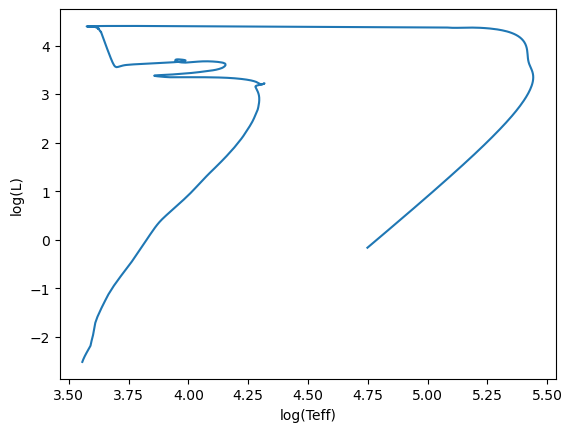

In [13]:
age_ind = iso.age_index(8.0) #returns the index for the desired age
logTeff = iso.isos[age_ind]['log_Teff']
logL = iso.isos[age_ind]['log_L']
plt.plot(logTeff, logL) 
plt.xlabel('log(Teff)')
plt.ylabel('log(L)')
# plt.axis([5.2, 3.3, -4, 5])

In [14]:
%cd "/home/dutta/Downloads/MIST_v1.2_vvcrit0.4_UBVRIplus"

/home/dutta/Downloads/MIST_v1.2_vvcrit0.4_UBVRIplus


In [15]:
isocmd = read_mist_models.ISOCMD("MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd")

Reading in: MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd


In [19]:
print('version: ', isocmd.version)
print('photometric system: ', isocmd.photo_sys)
print('abundances: ', isocmd.abun)
print('rotation: ', isocmd.rot)
print('ages: ', [round(x,2) for x in isocmd.ages])
print('number of ages: ', isocmd.num_ages)
print('available columns: ', isocmd.hdr_list)
print('Av extinction: ', isocmd.Av_extinction)

version:  {'MIST': '1.2', 'MESA': '7503'}
photometric system:  UBV(RI)c, 2MASS, Kepler, Hipparcos, Gaia (Vega)
abundances:  {'Yinit': 0.261, 'Zinit': 0.00803343, '[Fe/H]': -0.25, '[a/Fe]': 0.0}
rotation:  0.4
ages:  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
number of ages:  107
available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Be

In [22]:
# Iterate over each age and print the 'Bessell_B' column
for age in isocmd.ages:
    age_ind = isocmd.age_index(age)
    Gaia_G_EDR3 = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    print(f'Age (log10_isochrone_age_yr): {age}')
    print('Gaia_G_EDR3:', Gaia_G_EDR3)

Age (log10_isochrone_age_yr): 5.0
Gaia_G_EDR3: [ 8.137337e+00  8.083336e+00  7.994116e+00  7.906028e+00  7.818910e+00
  7.732743e+00  7.647547e+00  7.563378e+00  7.480205e+00  7.398082e+00
  7.316915e+00  7.236742e+00  7.156564e+00  7.067650e+00  6.979558e+00
  6.892173e+00  6.805413e+00  6.719372e+00  6.634066e+00  6.549159e+00
  6.464759e+00  6.388287e+00  6.313160e+00  6.238472e+00  6.163990e+00
  6.089921e+00  6.016046e+00  5.942338e+00  5.856945e+00  5.752541e+00
  5.647284e+00  5.541011e+00  5.434747e+00  5.348342e+00  5.291766e+00
  5.264472e+00  5.237831e+00  5.212358e+00  5.095623e+00  4.998288e+00
  4.913170e+00  4.760303e+00  4.651248e+00  4.532371e+00  4.414456e+00
  4.301732e+00  4.188044e+00  4.054902e+00  3.914846e+00  3.786085e+00
  3.664986e+00  3.548576e+00  3.446102e+00  3.342901e+00  3.237682e+00
  3.137402e+00  3.054894e+00  2.970971e+00  2.863071e+00  2.756548e+00
  2.650377e+00  2.545139e+00  2.454631e+00  2.371398e+00  2.297092e+00
  2.211823e+00  2.116248e+00  

Text(0, 0.5, 'GAIA G')

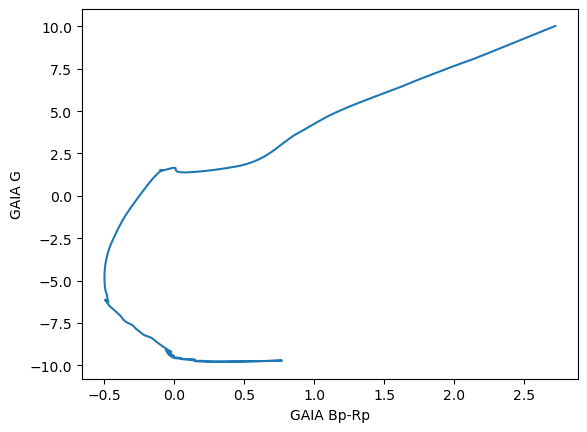

In [23]:
age_ind = isocmd.age_index(6.75) #returns the index for the desired age
B = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']
R = isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
G = isocmd.isocmds[age_ind]['Gaia_G_EDR3']

plt.plot(B-R, G) 
plt.xlabel('GAIA Bp-Rp')
plt.ylabel('GAIA G')
# plt.axis([-0.5, 2.0, 18, -7])

In [2]:
%cd "/home/dutta/Downloads/Summer'24/MIST_codes/scripts"
import read_mist_models

/home/dutta/Downloads/Summer'24/MIST_codes/scripts


In [10]:
%cd "/home/dutta/Downloads/Trial"

/home/dutta/Downloads/Trial


Reading in: 0010000M.track.eep.cmd
Reading in: 0020000M.track.eep.cmd
Reading in: 0030000M.track.eep.cmd
Reading in: 0040000M.track.eep.cmd
Reading in: 0050000M.track.eep.cmd
Reading in: 0060000M.track.eep.cmd
Reading in: 0070000M.track.eep.cmd
Reading in: 0080000M.track.eep.cmd
Reading in: 0090000M.track.eep.cmd
Reading in: 0100000M.track.eep.cmd
Reading in: 0110000M.track.eep.cmd
Reading in: 0120000M.track.eep.cmd
Reading in: 0130000M.track.eep.cmd
Reading in: 0140000M.track.eep.cmd
Reading in: 0150000M.track.eep.cmd
Reading in: 0160000M.track.eep.cmd
Reading in: 0170000M.track.eep.cmd
Reading in: 0180000M.track.eep.cmd
Reading in: 0190000M.track.eep.cmd
Reading in: 0200000M.track.eep.cmd
Reading in: 0210000M.track.eep.cmd
Reading in: 0220000M.track.eep.cmd
Reading in: 0230000M.track.eep.cmd
Reading in: 0240000M.track.eep.cmd
Reading in: 0250000M.track.eep.cmd
Reading in: 0260000M.track.eep.cmd
Reading in: 0270000M.track.eep.cmd
Reading in: 0280000M.track.eep.cmd
Reading in: 0290000M

/tmp/ipykernel_240451/1129352606.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))


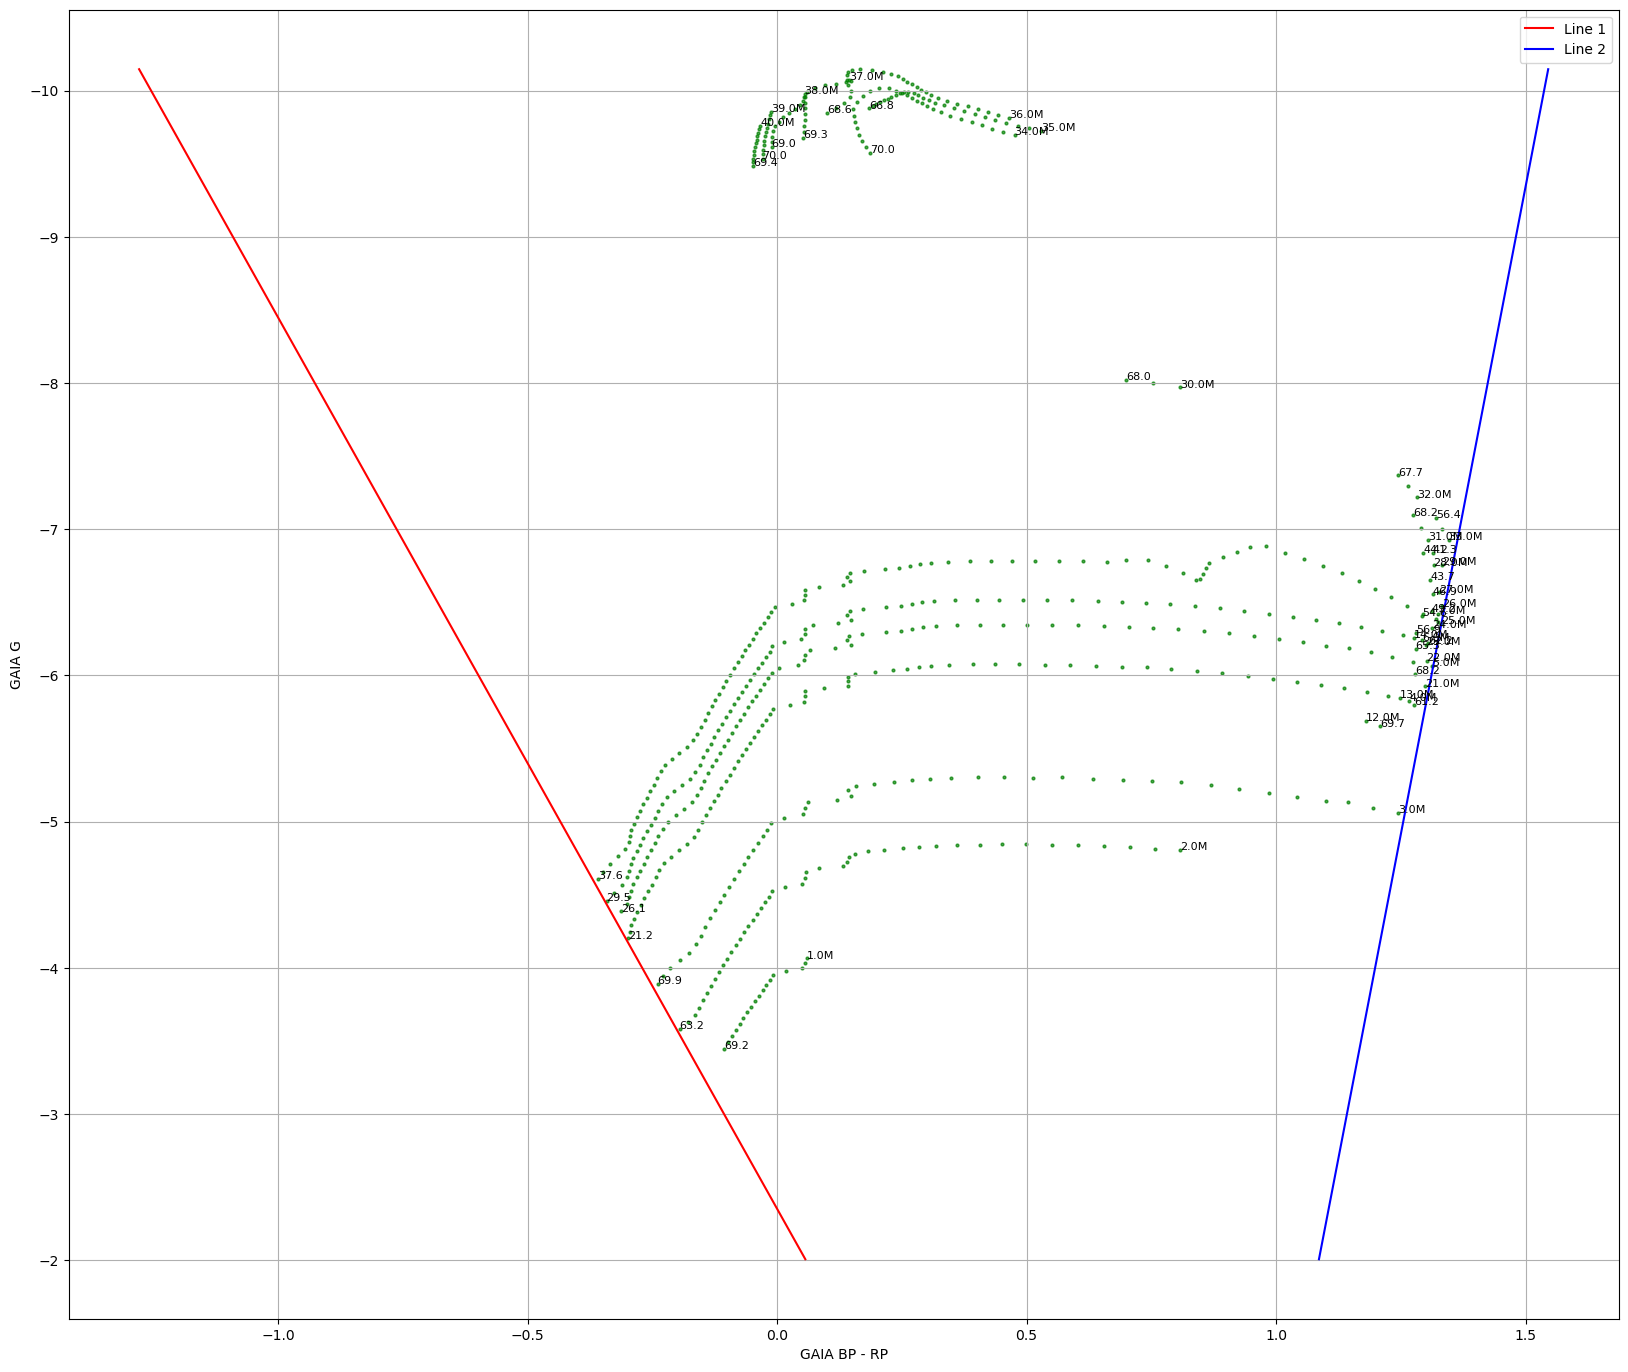

In [11]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import read_mist_models
import numpy as np

# Step 1: Change directory to the folder containing .eep.cmd files
os.chdir('/home/dutta/Downloads/MIST_ET')  # Update this to your directory path

# Step 2: Retrieve and sort .eep.cmd files
eep_cmd_files = glob.glob('*.eep.cmd')
eep_cmd_files.sort()  # Sort files by filename

# Consider only the first 40 files
eep_cmd_files = eep_cmd_files[:40]

# Function to read synthetic star data from .eep.cmd files
def read_synthetic_data(eep_cmd_files):
    data = []
    for eep_cmd_file in eep_cmd_files:
        eepcmd = read_mist_models.EEPCMD(eep_cmd_file)
        B = eepcmd.eepcmds['Gaia_BP_EDR3']
        R = eepcmd.eepcmds['Gaia_RP_EDR3']
        G = eepcmd.eepcmds['Gaia_G_EDR3']
        age = eepcmd.eepcmds['star_age']
        bp_rp = B - R
        for i in range(len(B)):
            data.append([age[i], bp_rp[i], G[i], eep_cmd_file])
    return pd.DataFrame(data, columns=['star_age', 'bp_rp', 'G', 'file'])

# Read the data from the .eep.cmd files
df = read_synthetic_data(eep_cmd_files)

# Step 3: Calculate age differences and identify regions with cumulative age difference <= 70 years
def find_fastest_regions(data):
    regions = []
    distances = []
    n = len(data)

    for i in range(n):
        cumulative_age_diff = 0
        region = []
        for j in range(i, n):
            if j > i:
                cumulative_age_diff += abs(data['star_age'].iloc[j] - data['star_age'].iloc[j-1])
            if cumulative_age_diff <= 70:
                region.append(j)
            else:
                break
        if len(region) > 1:
            start_age = data['star_age'].iloc[region[0]]
            end_age = data['star_age'].iloc[region[-1]]
            if abs(end_age - start_age) <= 70:
                # Calculate total Cartesian distance for the region
                total_distance = np.sum(np.sqrt(np.diff(data['bp_rp'].iloc[region])**2 + np.diff(data['G'].iloc[region])**2))
                regions.append(region)
                distances.append(total_distance)
    
    # Find the region with the highest total distance
    if regions:
        max_distance_region = regions[np.argmax(distances)]
        return data.iloc[max_distance_region]
    else:
        return pd.DataFrame(columns=data.columns)

# Filter the data to only consider regions within the defined lines
def filter_by_lines(df):
    line1 = (21 / 128) * df['G'] + 149 / 386
    line2 = (-7 / 124) * df['G'] + 603 / 620
    return df[(df['bp_rp'] <= line2) & (df['bp_rp'] >= line1) & (df['G'] <= -2)]

df = filter_by_lines(df)

# Plot the HR diagram with regions highlighted for each file
plt.figure(figsize=(20, 17))

colors = plt.cm.get_cmap('tab10', len(eep_cmd_files))

for idx, eep_cmd_file in enumerate(eep_cmd_files):
    file_data = df[df['file'] == eep_cmd_file].sort_values('star_age')
    fastest_region = find_fastest_regions(file_data)
    if not fastest_region.empty:
        start_age = fastest_region['star_age'].iloc[0]
        end_age = fastest_region['star_age'].iloc[-1]
        mass = int(eep_cmd_file.split('M')[0]) / 1e4  # Extract and format mass
        plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=4, alpha=0.7, color='green')
        # Annotate with the mass
        plt.text(fastest_region['bp_rp'].iloc[0], fastest_region['G'].iloc[0], f"{mass}M", fontsize=8, color='black')
        diff = end_age - start_age
        plt.text(fastest_region['bp_rp'].iloc[-1], fastest_region['G'].iloc[-1], f"{diff:.1f}", fontsize=8, color='black')

# Plot the lines
g_range = np.linspace(df['G'].min(), df['G'].max(), 100)
line1_values = (21 / 128) * g_range + 149 / 386
line2_values = (-7 / 124) * g_range + 603 / 620
plt.plot(line1_values, g_range, color='red', label='Line 1')
plt.plot(line2_values, g_range, color='blue', label='Line 2')

plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_regions_70_years.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No GAIA stars found within the specified region.


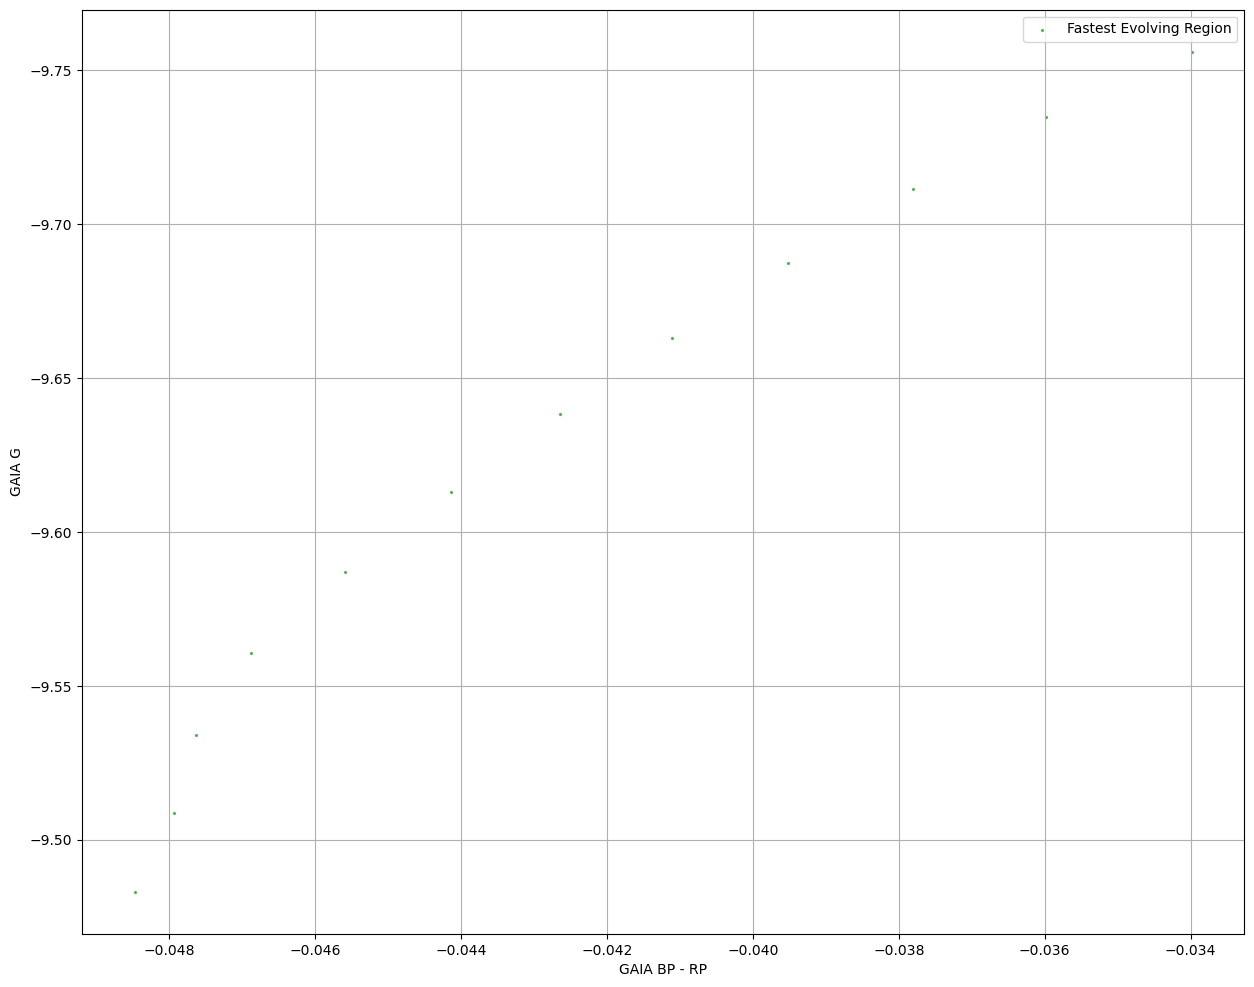

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astroquery.gaia import Gaia
from astropy.table import vstack

# Assuming df and fastest_region are already defined from the previous code snippet

# Define bp_rp and g magnitude limitations
bp_rp_min = -0.5  # Update this value based on your criteria
bp_rp_max = 1.5  # Update this value based on your criteria
g_min = -8  # Update this value based on your criteria
g_max = -3  # Update this value based on your criteria

# Step 5: Query GAIA EDR3 for real stars using the provided template
query_template = """
SELECT
    source_id,
    parallax,
    ra,
    dec,
    phot_g_mean_mag AS mg,
    phot_bp_mean_mag AS mbp,
    phot_rp_mean_mag AS mrp,
    bp_rp,
    phot_g_mean_flux,
    phot_bp_mean_flux,
    phot_rp_mean_flux,
    pmra,
    pmdec
FROM
    gaiaedr3.gaia_source
WHERE
    parallax_over_error > 10
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2)
    AND phot_bp_rp_excess_factor > 1.0 + 0.015 * POWER(bp_rp, 2)
    AND bp_rp IS NOT NULL
    AND phot_bp_mean_mag IS NOT NULL
    AND phot_rp_mean_mag IS NOT NULL
    AND dec > 0
    AND ra BETWEEN {ra_min} AND {ra_max}
    AND bp_rp BETWEEN {bp_rp_min} AND {bp_rp_max}
    AND (phot_g_mean_mag) BETWEEN {g_min} AND {g_max}
"""

# Function to execute a query for a given RA range
def execute_query(ra_min, ra_max):
    query = query_template.format(
        ra_min=ra_min, ra_max=ra_max,
        bp_rp_min=bp_rp_min, bp_rp_max=bp_rp_max,
        g_min=g_min, g_max=g_max
    )
    job = Gaia.launch_job_async(query)
    return job.get_results()

# Define RA ranges to split the query
ra_ranges = [(0, 60), (60, 120), (120, 180), (180, 240), (240, 300), (300, 360)]

# Execute queries and combine results
results = []
for ra_min, ra_max in ra_ranges:
    result = execute_query(ra_min, ra_max)
    results.append(result)

# Combine all results into a single table
gaia_results = vstack(results).to_pandas()

# Extract GAIA data
gaia_bp_rp = gaia_results['bp_rp']
gaia_g = gaia_results['mg']

# Filter GAIA stars within the region defined by the lines
line1_gaia = (21 / 128) * gaia_g + 149 / 386
line2_gaia = (-7 / 124) * gaia_g + 603 / 620
gaia_in_region = gaia_results[(gaia_bp_rp <= line2_gaia) & (gaia_bp_rp >= line1_gaia)]

# Plot the HR diagram with the fastest evolving regions and filtered GAIA stars
plt.figure(figsize=(15, 12))
plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')
if not gaia_in_region.empty:
    plt.scatter(gaia_in_region['bp_rp'], gaia_in_region['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found within the specified region.")
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Save the plot to a file
output_path = 'fastest_evolving_region_with_gaia_H_gap.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()

In [13]:
# Define the output path for the text file
output_text_path = 'selected_gaia_stars_H_gap.txt'

# Check if the closest GAIA stars DataFrame is not empty
if not closest_gaia_stars.empty:
    # Select the desired columns to save
    columns_to_save = ['source_id', 'parallax', 'ra', 'dec', 'mg', 'mbp', 'mrp', 'bp_rp', 'phot_g_mean_flux', 'phot_bp_mean_flux', 'phot_rp_mean_flux', 'pmra', 'pmdec']
    
    # Save the details to a text file
    closest_gaia_stars[columns_to_save].to_csv(output_text_path, index=False, sep='\t')
    print(f"Details of the selected GAIA stars have been saved to {output_text_path}")
else:
    print("No GAIA stars were selected to save.")

NameError: name 'closest_gaia_stars' is not defined

No GAIA stars found within the specified region.


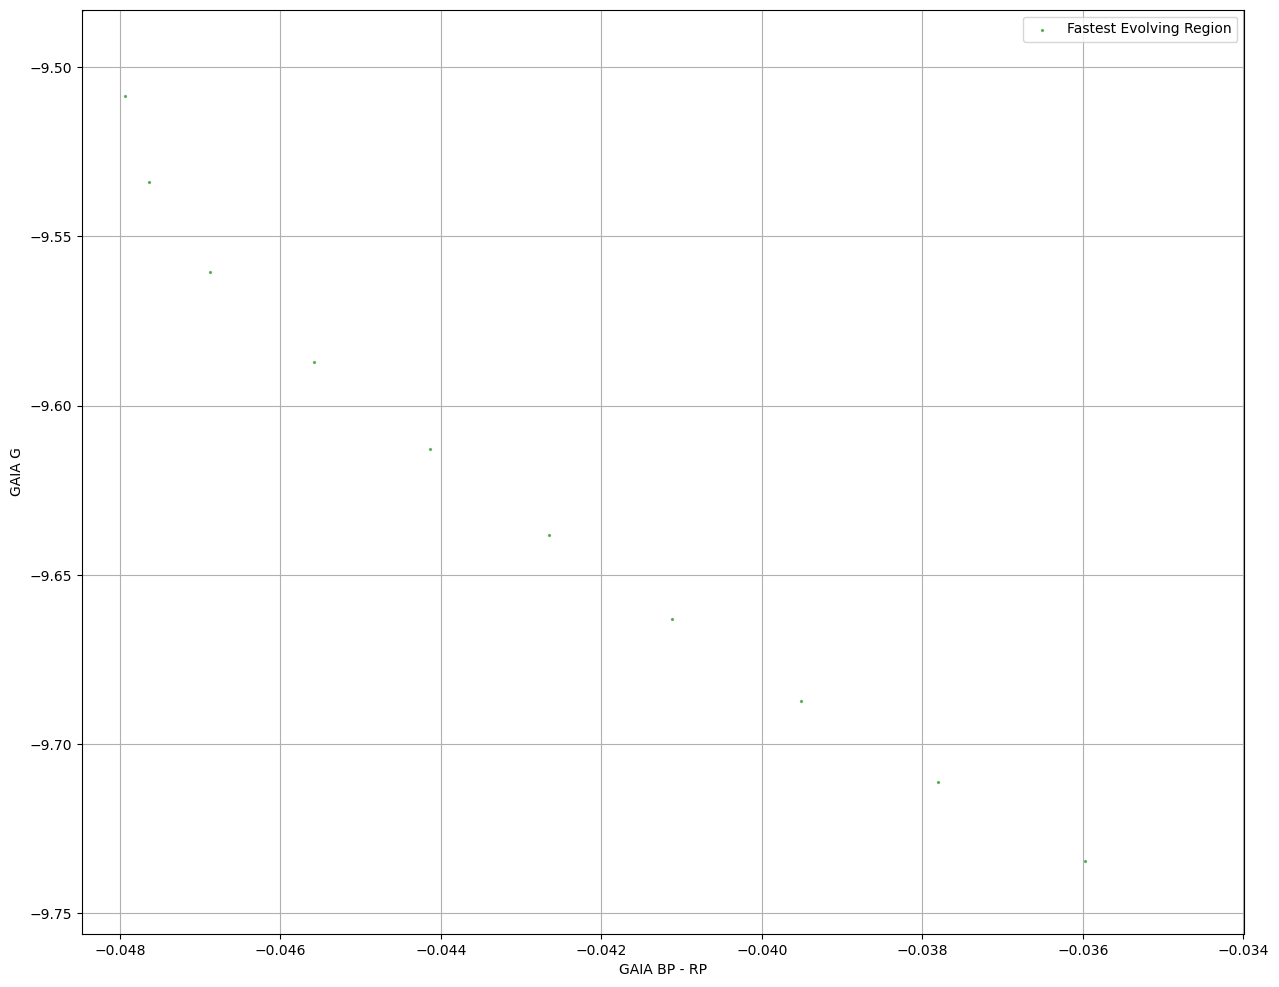

In [14]:
import matplotlib.pyplot as plt

# Assuming fastest_region and gaia_in_region dataframes are available
# with columns 'bp_rp' and 'G' for synthetic data, and 'bp_rp' and 'mg' for GAIA data

# Create a new figure to overlay the plots
plt.figure(figsize=(15, 12))

# Plot the synthetic data
plt.scatter(fastest_region['bp_rp'], fastest_region['G'], s=2, alpha=0.5, color='green', label='Fastest Evolving Region')

# Plot the GAIA data
if not gaia_in_region.empty:
    plt.scatter(gaia_in_region['bp_rp'], gaia_in_region['mg'], s=4, alpha=0.6, color='blue', label='GAIA Stars')
else:
    print("No GAIA stars found within the specified region.")

# Setting labels and inverting the y-axis
plt.xlabel('GAIA BP - RP')
plt.ylabel('GAIA G')
plt.gca().invert_yaxis()  # Invert the y-axis to match astronomical convention
plt.legend()
plt.grid(True)

# Optionally, adjust the x and y limits if needed
plt.xlim(min(fastest_region['bp_rp'].min(), gaia_in_region['bp_rp'].min()), max(fastest_region['bp_rp'].max(), gaia_in_region['bp_rp'].max()))
plt.ylim(min(fastest_region['G'].min(), gaia_in_region['mg'].min()), max(fastest_region['G'].max(), gaia_in_region['mg'].max()))

# Save the overlay plot to a file
output_path = 'overlay_fastest_region_with_gaia.png'  # Update with your desired output path
plt.savefig(output_path, format='png')

# Show the plot
plt.show()